In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings 
warnings.filterwarnings('ignore')
print("done")


done


In [2]:
df = pd.read_csv("variables.csv")
df = df.drop(['Unnamed: 0'],axis=1)
df.head()

,Total_Days,amount_raised_usd,amount_raised_usd_boxcox,state,currency,category,month_launch
0,21,840.0,5.514380,0,USD,Transportation,4
1,22,250.0,4.682444,0,USD,Human Rights,6
2,22,200.0,4.522399,0,USD,Human Rights,6
3,30,500.0,5.165823,0,USD,Photography,9
4,120,360.0,4.939299,0,USD,Human Rights,9


In [3]:
df_x = df[['Total_Days','currency','category','month_launch']]
df_x.head()

,Total_Days,currency,category,month_launch
0,21,USD,Transportation,4
1,22,USD,Human Rights,6
2,22,USD,Human Rights,6
3,30,USD,Photography,9
4,120,USD,Human Rights,9


In [4]:
df_y = df[['amount_raised_usd_boxcox','state']]
df_y.head()

,amount_raised_usd_boxcox,state
0,5.514380,0
1,4.682444,0
2,4.522399,0
3,5.165823,0
4,4.939299,0


In [5]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20618 entries, 0 to 20617
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Total_Days    20618 non-null  int64 
 1   currency      20618 non-null  object
 2   category      20618 non-null  object
 3   month_launch  20618 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 644.4+ KB


In [6]:
# change datatype to object
df_x['Total_Days'] = df_x['Total_Days'].astype('object')
df_x['month_launch'] = df_x['month_launch'].astype('object')
df_x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20618 entries, 0 to 20617
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Total_Days    20618 non-null  object
 1   currency      20618 non-null  object
 2   category      20618 non-null  object
 3   month_launch  20618 non-null  object
dtypes: object(4)
memory usage: 644.4+ KB


In [7]:
label = LabelEncoder()
x_col = df_x.columns
x_col


Index(['Total_Days', 'currency', 'category', 'month_launch'], dtype='object')

In [8]:
for col in x_col:
    df_x[col] = label.fit_transform(df_x[col])

In [9]:
from sklearn.model_selection import train_test_split

# splitting Data
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size = 0.2,random_state =42)
x_train.head()


,Total_Days,currency,category,month_launch
11658,45,10,2,9
13054,40,10,14,3
3449,30,4,23,5
13556,30,1,25,5
18286,30,10,0,0


In [10]:
# onehot processing
df_x_onehot = df_x.copy()

for c in df_x_onehot.columns:
    df_x_onehot[c] = df_x_onehot[c].astype('object') # changing to object type for onehot processsing
    
df_x_onehot = pd.get_dummies(df_x_onehot)

x_train_onehot, x_test_onehot, y_train_onehot, y_test_onehot = train_test_split(df_x_onehot ,df_y,test_size=0.2,random_state=42)


In [11]:
# Training Using Decision Tree Classifier Model
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(x_train,y_train['state'])

DecisionTreeClassifier(random_state=42)

#### RandomForest Classifier
A random forest classifier is a machine learning algorithm that can be used for classification tasks. It is a type of ensemble learning method that combines multiple decision trees to make predictions. We feed it data without one-hot encoding as they generally perform worst due to curses of dimensionality.

Referrences:
https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769

In [12]:
# Training using Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier
random_clf = RandomForestClassifier(random_state=42)
random_clf.fit(x_train,y_train['state'])

RandomForestClassifier(random_state=42)

#### Support Vector Classifier
The SVC algorithm works by finding the hyperplane that maximally separates the classes in the feature space. The hyperplane is the boundary line that separates the classes with the maximum margin, which is the distance between the hyperplane and the closest data points from each class.

During the training process, the SVC algorithm tries to find the optimal hyperplane that separates the data points with the maximum margin. This is done by finding the support vectors, which are the data points closest to the hyperplane. The support vectors are used to define the position and orientation of the hyperplane, which can then be used to classify new data points

The main idea behind SVC is to find the best decision boundary that separates the different classes of data points. It is able to spot non-linear relationship through the help of "kernel tricks" too.

Referrences: 
1) https://www.kaggle.com/code/prashant111/svm-classifier-tutorial

In [13]:
# support Vector linear Classifier
from sklearn.svm import SVC
support_clf_lin = SVC(kernel='linear')
support_clf_lin.fit(x_train_onehot,y_train_onehot['state'])

SVC(kernel='linear')

In [14]:
# support Vector poly Classifier
support_clf_poly = SVC(kernel='poly')
support_clf_poly.fit(x_train_onehot,y_train_onehot['state'])

SVC(kernel='poly')

In [15]:
# support Vector rbf Classifier
support_clf_rbf = SVC(kernel='rbf')
support_clf_rbf.fit(x_train_onehot,y_train_onehot['state'])

SVC()

In [16]:
# support Vector sigmoid Classifier
support_clf_sig = SVC(kernel='sigmoid')
support_clf_sig.fit(x_train_onehot,y_train_onehot['state'])

SVC(kernel='sigmoid')

#### K nearest neighbors classifier
The KNN algorithm works by finding the K closest data points to a new data point in the training set, and predicting the class of the new data point based on the classes of the K nearest neighbors.

Referrences: 1)https://www.kaggle.com/code/prashant111/knn-classifier-tutorial

In [17]:
# K neighbors classifier
from sklearn.neighbors import KNeighborsClassifier
neighbor_clf = KNeighborsClassifier()
neighbor_clf.fit(x_train_onehot,y_train_onehot['state'])

KNeighborsClassifier()

#### Extreme Gradient Boosting (XGB) classifier
The XGBoost algorithm works by iteratively adding weak decision tree models to the ensemble, with each tree trained to correct the mistakes made by the previous trees. The algorithm optimizes the overall objective function by minimizing the sum of the loss function over all the individual trees

During the training process, XGBoost uses a gradient descent optimization algorithm to find the best weights for each tree in the ensemble. The algorithm also includes regularization techniques such as L1 and L2 regularization, to prevent overfitting and improve the model's generalization performance.

To classify a new data point, XGBoost combines the predictions of all the individual trees in the ensemble. The final prediction is made by taking the weighted average of the individual tree predictions, with the weights determined by the tree's performance on the training data

Referrences:
1) https://www.kaggle.com/getting-started/145362

2) https://xgboost.readthedocs.io/en/stable/

In [18]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(x_train_onehot,y_train_onehot['state'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [19]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score

def clf_report_metrics(model,x_test,y_test,figsize=(8,4)):
    
    pred_clf = model.predict(x_test)
    conf_matrix = confusion_matrix(y_test, pred_clf)
    recall = recall_score(y_test,pred_clf)
    precision = precision_score(y_test,pred_clf)
    f1 = f1_score(y_test,pred_clf)
    
    
    # metrics
    print(f"METRICS:\n")
    print(f"Recall: {recall:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print("__________________________________________________________________________")
    print()
    
    # Confusion Matrix
    print(f"Confusion Matrix: \n ")
    fig,axes = plt.subplots(1,2,sharey=True,sharex=True,figsize=figsize)
    # by count
    sns.heatmap(conf_matrix,annot=True,fmt = ".0f",ax=axes[0],cbar=False)
    axes[0].set_title("count")
    # by percentage
    sns.heatmap((conf_matrix/np.sum(conf_matrix)),annot=True,fmt=".2%",cmap='Blues',ax=axes[1],cbar=False)
    axes[1].set_title("percentage")
    
    # formatting labels
    fig.supxlabel('Predicted')
    fig.supylabel('Actual')
    
    plt.show()
    
    return recall, precision, f1
    
    
    

We know that our model consist of more negative samples than positive samples in the success state of the campaign. Hence, accuracy will not be a good measure to predict our case study. We will use other measures like Precision, Recall and F1 Score.

- <b>Precision = TP/TP+FP</b>

From the equation, we can see that it measures out of the predicted positive, how many are True Positive?
- <b>Recall = TP/TP+FN</b>

From the equation we can see that it measures out of the actual positive, how many are True Positive?
- <b> F1 Score = 2 * (Precision*Recall)/(Precison+Recall)</b>

This metrics seek to seek the balance between precision and recall
    
Our case study involves us to predict whether the campaign will be successful given the x_variable. We will ask ourselves, which is more damaging if an imaginary client uses the model.

<b>False positive</b> will indicate that our model predicted that you will be successful in your campaign if you launch using these variables, but in actual, you would not be successful.
    
<b>False negative</b> will indicate that our model predicted that you will not be successful in your campaign if you launch using these variables, but in actual, you will be successful.

It does seem that both are important, but perhaps, precision might be more important in this case. Because, if we tell our client that <I><b>he will be successful in his campaign according to the model, but if he launch his campaign and is not successful</b></I>, it shows <b>our model is incapable</b>.
    
On the other hand, if we tell him that <I><b>he will not be successful</b></I> given the variables when in actual he might succeed, then he still <I><b>can make further adjustment in his variables before launching the campaign</b></I>. Thus, recall pales in comparison to precision in our use case.

Nonetheless, it is can still be an important metric. 
Perhaps, we should have the goal to optimise both <b>Precision and F1 score</b> in our classification case study

References:
1) https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9


#### Model Fitting

METRICS:

Recall: 0.474
Precision: 0.552
F1 Score: 0.510
__________________________________________________________________________

Confusion Matrix: 
 


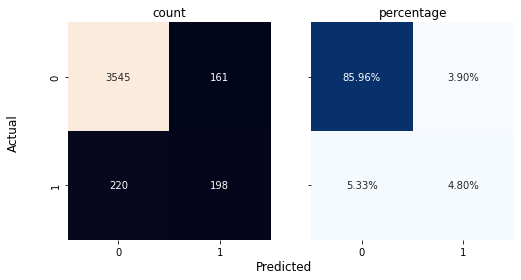

(0.47368421052631576, 0.5515320334261838, 0.5096525096525096)

In [20]:
# Decision Tree Classifier
clf_report_metrics(model=tree_clf,x_test=x_test,y_test=y_test['state'])

METRICS:

Recall: 0.488
Precision: 0.636
F1 Score: 0.552
__________________________________________________________________________

Confusion Matrix: 
 


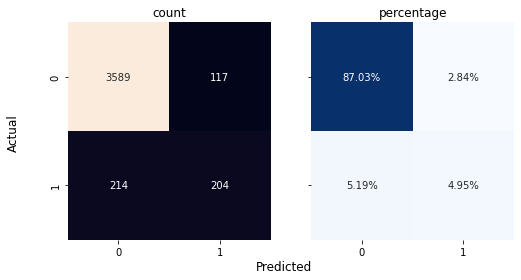

(0.4880382775119617, 0.6355140186915887, 0.5520974289580514)

In [21]:
# Random Forest Classifier
clf_report_metrics(model=random_clf,x_test=x_test,y_test=y_test['state'])

METRICS:

Recall: 0.536
Precision: 0.689
F1 Score: 0.603
__________________________________________________________________________

Confusion Matrix: 
 


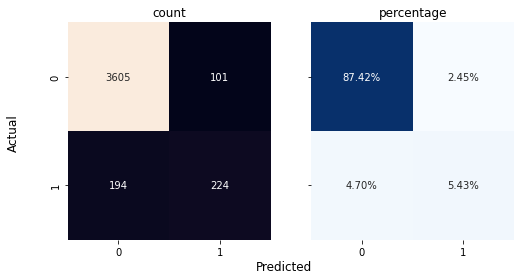

(0.5358851674641149, 0.6892307692307692, 0.6029609690444145)

In [22]:
# SVC linear Classifier
clf_report_metrics(model=support_clf_lin,x_test=x_test_onehot,y_test=y_test_onehot['state'])

METRICS:

Recall: 0.495
Precision: 0.697
F1 Score: 0.579
__________________________________________________________________________

Confusion Matrix: 
 


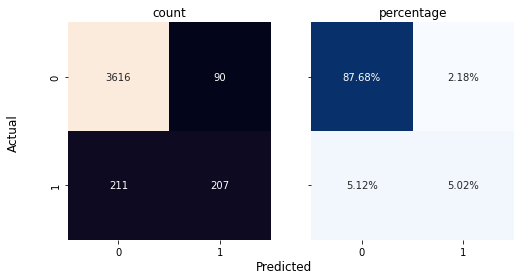

(0.49521531100478466, 0.696969696969697, 0.5790209790209789)

In [23]:
# SVC poly Classifier
clf_report_metrics(model=support_clf_poly,x_test=x_test_onehot,y_test=y_test_onehot['state'])

METRICS:

Recall: 0.519
Precision: 0.693
F1 Score: 0.594
__________________________________________________________________________

Confusion Matrix: 
 


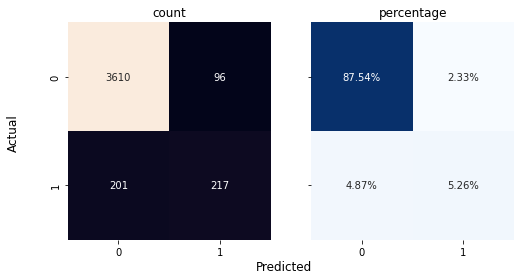

(0.5191387559808612, 0.6932907348242812, 0.5937072503419972)

In [24]:
# SVC rbf Classifier
clf_report_metrics(model=support_clf_rbf,x_test=x_test_onehot,y_test=y_test_onehot['state'])

METRICS:

Recall: 0.455
Precision: 0.528
F1 Score: 0.488
__________________________________________________________________________

Confusion Matrix: 
 


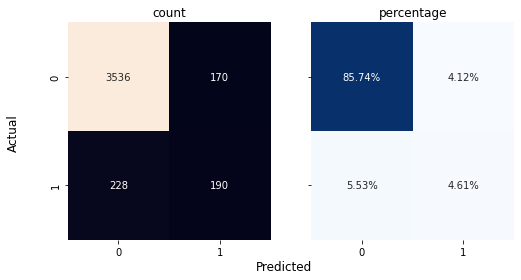

(0.45454545454545453, 0.5277777777777778, 0.4884318766066838)

In [25]:
# SVC sigmoid classifier
clf_report_metrics(model=support_clf_sig,x_test=x_test_onehot,y_test=y_test_onehot['state'])

METRICS:

Recall: 0.464
Precision: 0.651
F1 Score: 0.542
__________________________________________________________________________

Confusion Matrix: 
 


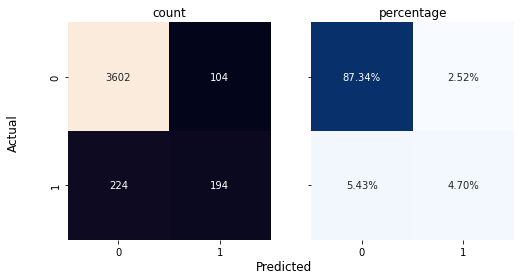

(0.46411483253588515, 0.6510067114093959, 0.541899441340782)

In [26]:
# K Neighbors Classifier
clf_report_metrics(model=neighbor_clf,x_test=x_test_onehot,y_test=y_test_onehot['state'])

METRICS:

Recall: 0.495
Precision: 0.690
F1 Score: 0.577
__________________________________________________________________________

Confusion Matrix: 
 


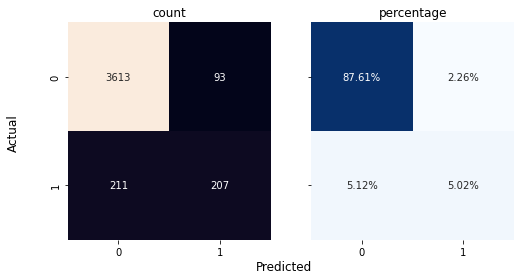

(0.49521531100478466, 0.69, 0.5766016713091923)

In [27]:
clf_report_metrics(model=xgb_clf,x_test=x_test_onehot,y_test=y_test_onehot['state'])

From our results, we see that out of all the models we fit, SVC and xgboost seem to perform the best(highest precision, f1-score). We will choose these models as our prediction for classification task and do more tuning to increase their performance.

#### Including the sentiment score in our prediction

From our previous EDA, we found out some form of relationship between the sentiment score and the success state of the campaign. We will try to incorporate it into our model and compare with the metrics to see if it improves our results.

In [28]:
text_df = pd.read_csv("text_results_cleaned.csv")

In [29]:
df_x_onehot['compound_tag_vader'] = text_df['compound_tag_vader']
df_x_onehot['pos_tag_disBert'] = text_df['pos_tag_disBert']
df_x_onehot['compound_ti_vader'] = text_df['compound_ti_vader']
df_x_onehot['pos_ti_disBert'] = text_df['pos_ti_disBert']

In [30]:
x_train_onehot, x_test_onehot, y_train_onehot, y_test_onehot = train_test_split(df_x_onehot ,df_y,test_size=0.2,random_state=42)

In [31]:
# support Vector rbf Classifier
support_clf_rbf = SVC(kernel='rbf')
support_clf_rbf.fit(x_train_onehot,y_train_onehot['state'])

SVC()

In [32]:
# XGBoost Classifier
xgb_clf = XGBClassifier()
xgb_clf.fit(x_train_onehot,y_train_onehot['state'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

METRICS:

Recall: 0.529
Precision: 0.691
F1 Score: 0.599
__________________________________________________________________________

Confusion Matrix: 
 


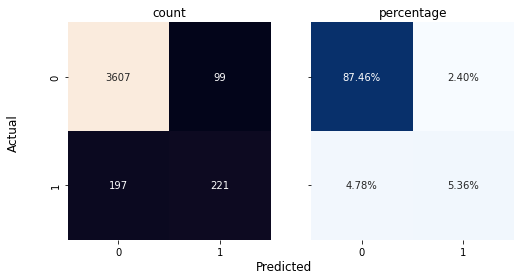

(0.5287081339712919, 0.690625, 0.5989159891598916)

In [33]:
# SVC rbf Classifier
clf_report_metrics(model=support_clf_rbf,x_test=x_test_onehot,y_test=y_test_onehot['state'])

METRICS:

Recall: 0.493
Precision: 0.687
F1 Score: 0.574
__________________________________________________________________________

Confusion Matrix: 
 


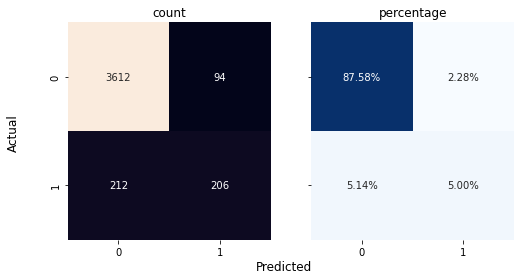

(0.49282296650717705, 0.6866666666666666, 0.5738161559888578)

In [34]:
clf_report_metrics(model=xgb_clf,x_test=x_test_onehot,y_test=y_test_onehot['state'])

From our results, it seems that the variables being added has little effect on improving our model. In fact, for both cases, the precision of our model drop, albeit slightly. However, it is interesting to see that our SVC recall score improves slighlty by adding these variables, while the xgboost classifier recall score actually decreases. Observation for this may be a coincidence. We will do <b>Stratified K fold cross validation</b> to see whether our results sustain for these 2 models.

We noticed that our data is very imbalance. Stratified K-fold cross-validation is a type of cross-validation that is especially useful when dealing with imbalanced datasets, where one class may be significantly underrepresented in the data.

Stratified K-fold cross-validation ensures that each fold has a representative sample of each class, which can help to reduce bias in the evaluation of the model's performance. By stratifying the folds, the algorithm ensures that the same class imbalance that may be present in the original dataset is also present in each fold.

References:
1) https://www.analyticsvidhya.com/blog/2021/05/4-ways-to-evaluate-your-machine-learning-model-cross-validation-techniques-with-python-code/

METRICS:

Recall: 0.531
Precision: 0.709
F1 Score: 0.607
__________________________________________________________________________

Confusion Matrix: 
 


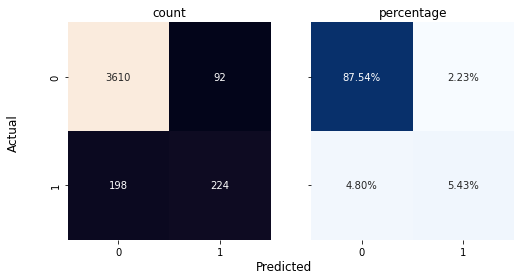

METRICS:

Recall: 0.540
Precision: 0.750
F1 Score: 0.628
__________________________________________________________________________

Confusion Matrix: 
 


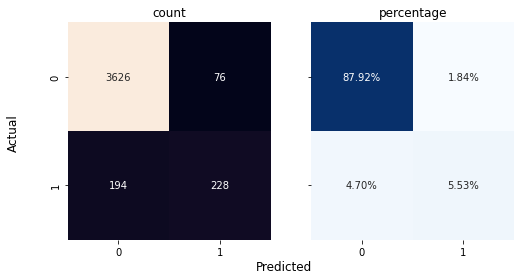

METRICS:

Recall: 0.538
Precision: 0.730
F1 Score: 0.619
__________________________________________________________________________

Confusion Matrix: 
 


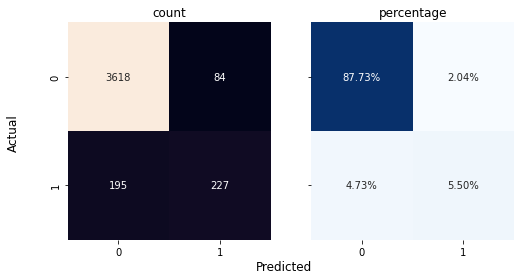

METRICS:

Recall: 0.504
Precision: 0.714
F1 Score: 0.591
__________________________________________________________________________

Confusion Matrix: 
 


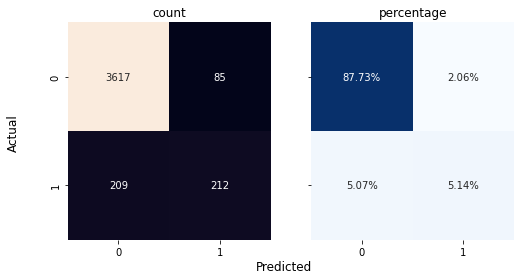

METRICS:

Recall: 0.504
Precision: 0.702
F1 Score: 0.586
__________________________________________________________________________

Confusion Matrix: 
 


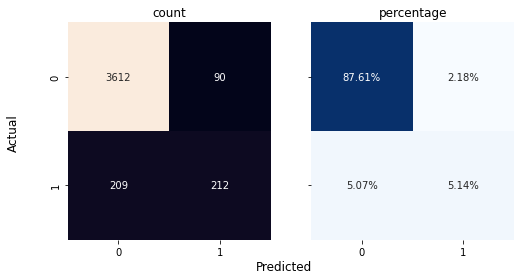

The mean precision is: 0.7209111530485528
The mean f1 score is: 0.6062984600945481


In [35]:
from sklearn.model_selection import StratifiedKFold
from statistics import mean

# SVC
kfold = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
splits = kfold.split(df_x_onehot,df_y)
cv_precision =[]
cv_f1 = []

for train_index,test_index in kfold.split(df_x_onehot,df_y['state']):
    x_train,x_test = df_x_onehot.loc[train_index], df_x_onehot.loc[test_index]
    y_train,y_test = df_y['state'].loc[train_index],df_y['state'].loc[test_index]
    
    support_clf_rbf = SVC(kernel='rbf')
    support_clf_rbf.fit(x_train,y_train)
    _, precision, f1 = clf_report_metrics(model = support_clf_rbf,x_test = x_test,y_test=y_test)
    cv_precision.append(precision)
    cv_f1.append(f1)
    
print("The mean precision is:", mean(cv_precision))
print("The mean f1 score is:", mean(cv_f1))

METRICS:

Recall: 0.469
Precision: 0.702
F1 Score: 0.562
__________________________________________________________________________

Confusion Matrix: 
 


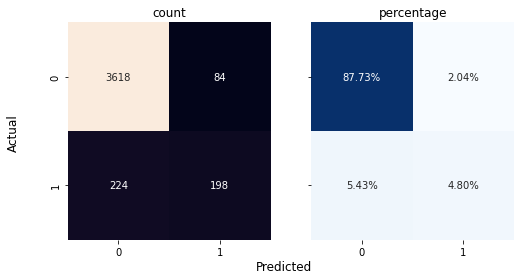

METRICS:

Recall: 0.502
Precision: 0.754
F1 Score: 0.603
__________________________________________________________________________

Confusion Matrix: 
 


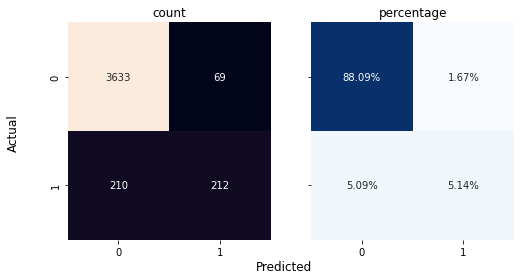

METRICS:

Recall: 0.488
Precision: 0.715
F1 Score: 0.580
__________________________________________________________________________

Confusion Matrix: 
 


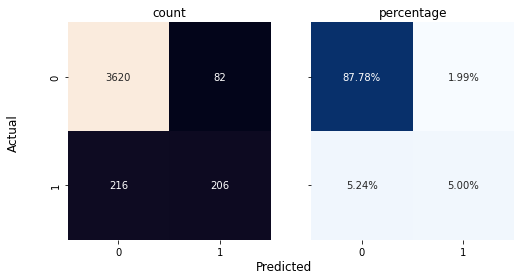

METRICS:

Recall: 0.468
Precision: 0.711
F1 Score: 0.564
__________________________________________________________________________

Confusion Matrix: 
 


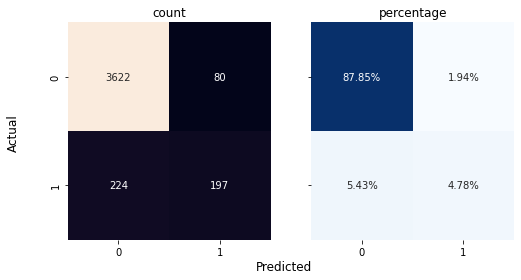

METRICS:

Recall: 0.473
Precision: 0.716
F1 Score: 0.569
__________________________________________________________________________

Confusion Matrix: 
 


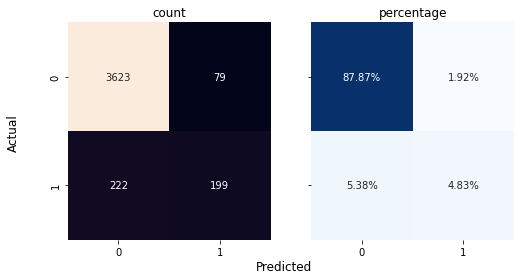

The mean precision is: 0.7197745019596654
The mean f1 score is: 0.5759531769789848


In [36]:
# XGB Classifier
kfold = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
splits = kfold.split(df_x_onehot,df_y)
cv_precision =[]
cv_f1 = []

for train_index,test_index in kfold.split(df_x_onehot,df_y['state']):
    x_train,x_test = df_x_onehot.loc[train_index], df_x_onehot.loc[test_index]
    y_train,y_test = df_y['state'].loc[train_index],df_y['state'].loc[test_index]
    
    xgb_clf = XGBClassifier()
    xgb_clf.fit(x_train,y_train)
    _, precision, f1 = clf_report_metrics(model = xgb_clf,x_test = x_test,y_test=y_test)
    cv_precision.append(precision)
    cv_f1.append(f1)
    
print("The mean precision is:", mean(cv_precision))
print("The mean f1 score is:", mean(cv_f1))    
    

From our results, we see that the performance of our model improves compared to the previous. One possible explanation for it is that we uses Stratified sampling in our splitting of data. Since our data is very skewed towards the negative samples, the previous random sampling way of splitting may have a subset of a more concentrated amount of data, leading to lower evaluation of our performance. Stratified sampling, on the other hand ensure that we have equal distribution of the imbalance between positve and negative sample of the data. Hence, may be more reliable in explaining our model performance and preventing possible underfitting/overfitting due to the imbalanceness of the datasets


METRICS:

Recall: 0.512
Precision: 0.704
F1 Score: 0.593
__________________________________________________________________________

Confusion Matrix: 
 


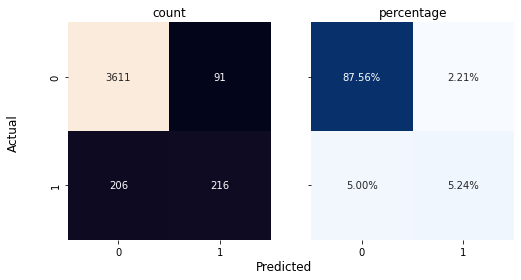

METRICS:

Recall: 0.540
Precision: 0.750
F1 Score: 0.628
__________________________________________________________________________

Confusion Matrix: 
 


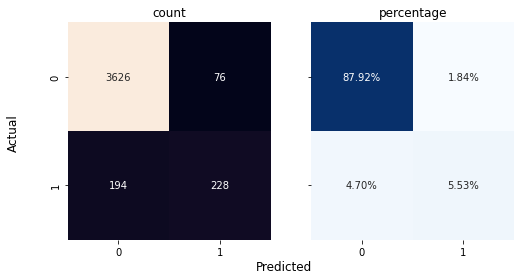

METRICS:

Recall: 0.538
Precision: 0.730
F1 Score: 0.619
__________________________________________________________________________

Confusion Matrix: 
 


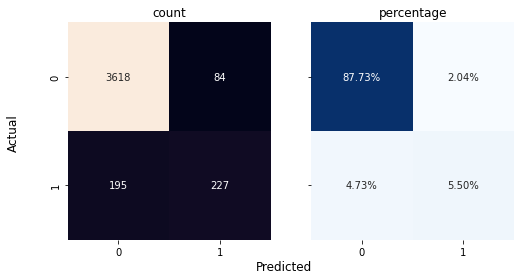

METRICS:

Recall: 0.496
Precision: 0.716
F1 Score: 0.586
__________________________________________________________________________

Confusion Matrix: 
 


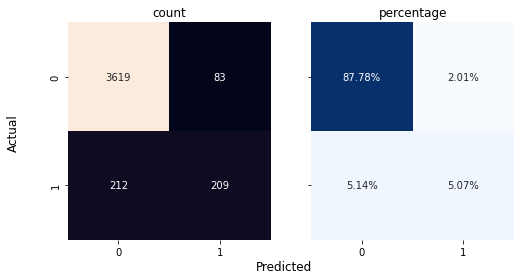

METRICS:

Recall: 0.504
Precision: 0.700
F1 Score: 0.586
__________________________________________________________________________

Confusion Matrix: 
 


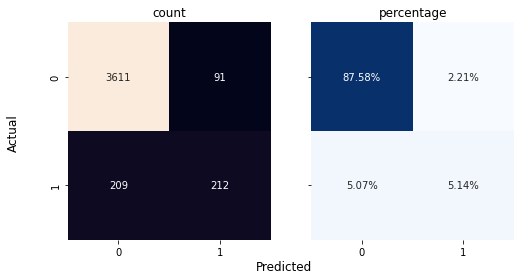

The mean precision is: 0.7197819981041953
The mean f1 score is: 0.6023909653496948


In [37]:
# SVC No Text

kfold = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
splits = kfold.split(df_x_onehot,df_y)
cv_precision =[]
cv_f1 = []

df_x_onehot_noText = df_x_onehot.drop(['compound_tag_vader','pos_tag_disBert','compound_ti_vader','pos_ti_disBert'],axis=1)
for train_index,test_index in kfold.split(df_x_onehot_noText,df_y['state']):
    x_train,x_test = df_x_onehot_noText.loc[train_index], df_x_onehot_noText.loc[test_index]
    y_train,y_test = df_y['state'].loc[train_index],df_y['state'].loc[test_index]
    
    support_clf_rbf = SVC(kernel='rbf')
    support_clf_rbf.fit(x_train,y_train)
    _, precision, f1 = clf_report_metrics(model = support_clf_rbf,x_test = x_test,y_test=y_test)
    cv_precision.append(precision)
    cv_f1.append(f1)
    
print("The mean precision is:", mean(cv_precision))
print("The mean f1 score is:", mean(cv_f1))    



METRICS:

Recall: 0.488
Precision: 0.730
F1 Score: 0.585
__________________________________________________________________________

Confusion Matrix: 
 


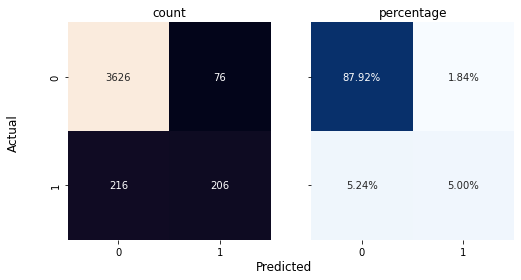

METRICS:

Recall: 0.524
Precision: 0.765
F1 Score: 0.622
__________________________________________________________________________

Confusion Matrix: 
 


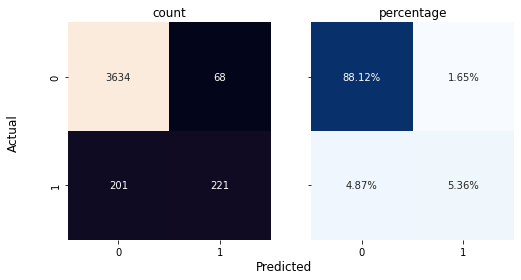

METRICS:

Recall: 0.521
Precision: 0.748
F1 Score: 0.615
__________________________________________________________________________

Confusion Matrix: 
 


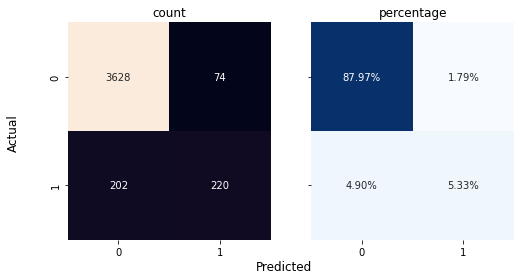

METRICS:

Recall: 0.475
Precision: 0.719
F1 Score: 0.572
__________________________________________________________________________

Confusion Matrix: 
 


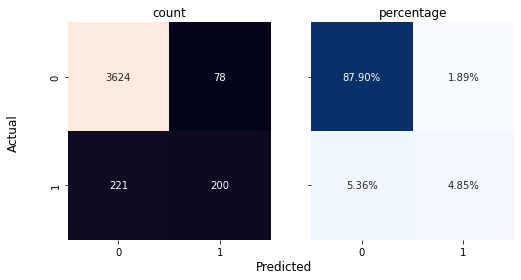

METRICS:

Recall: 0.480
Precision: 0.704
F1 Score: 0.571
__________________________________________________________________________

Confusion Matrix: 
 


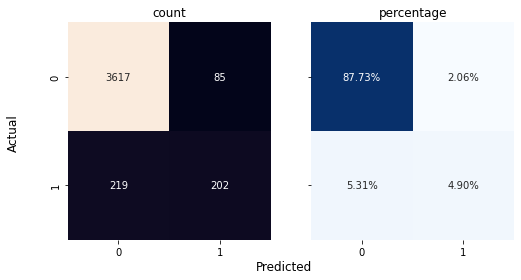

The mean precision is: 0.7265668859547414
The mean f1 score is: 0.5976234408193264


In [38]:
# XGB Classifier No Text


for train_index,test_index in kfold.split(df_x_onehot_noText,df_y['state']):
    x_train,x_test = df_x_onehot_noText.loc[train_index], df_x_onehot_noText.loc[test_index]
    y_train,y_test = df_y['state'].loc[train_index],df_y['state'].loc[test_index]
    
    xgb_clf = XGBClassifier()
    xgb_clf.fit(x_train,y_train)
    _, precision, f1 = clf_report_metrics(model = xgb_clf,x_test = x_test,y_test=y_test)
    cv_precision.append(precision)
    cv_f1.append(f1)
    
print("The mean precision is:", mean(cv_precision))
print("The mean f1 score is:", mean(cv_f1))    


From the results, it seem that there is a slight discrepancy between XGB Classifier and SVC Classifier in whether the sentiment score helps to increase the performance of the prediction. For SVC, it actually increases very slightly with the sentiment score data, while for XGBoost, the sentiment score data actually hinders the performance in the prediction.

We are still unable to conclude whether to include or exclude these variables, so in order to do so, perhaps we should optimize both our models first to see if there will be significant discrepancy between the performance after hyperparameter tuning.

# Hyperparameter Tuning

Hyperparameter tuning is the process of finding the best values for the parameters of a machine learning model that cannot be learned directly from training data. It involves trying different combinations of values for these parameters to find the combination that results in the best performance on a validation set 

References: 
1) https://grabngoinfo.com/hyperparameter-tuning-for-xgboost-grid-search-vs-random-search-vs-bayesian-optimization/

2) https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/

#### Hyperparameter Tuning XGB Classifier with hyperopt (bayesian-optimization)

In [39]:
x_train_noText, x_test_noText, y_train_noText, y_test_noText = train_test_split(df_x_onehot_noText, df_y['state'],
                                                                             test_size=0.2, stratify=df_y['state'],
                                                                             random_state=42)

In [74]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval

space={
    'learning_rate': hp.choice('learning_rate',[0.0001,0.001,0.01,0.1,1]),
    'max_depth': hp.choice('max_depth',range(3,21,3)),
    'gamma': hp.choice('gamma',[i/10.0 for i in range(0,5)]),
    'colsample_bytree': hp.choice('colsample_bytree',[i/10.0 for i in range(3,10)]),
    'reg_alpha': hp.choice('reg_alpha',[1e-5,1e-2,0.1,1,10,100]),
    'reg_lambda': hp.choice('reg_lambda',[1e-5,1e-2,0.1,1,10,100])
      }

In [66]:
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [70]:
from sklearn.model_selection import cross_val_score
def objective(params):
    xgb_clf = XGBClassifier(seed=0,**params)
    score = cross_val_score(estimator=xgb_clf,
                            X = x_train_noText,
                            y= y_train_noText,
                            cv = kfold,
                            scoring = 'precision'
                           ).mean()
    loss = -score
    return {'loss': loss, 'params':params,'status':STATUS_OK}

In [71]:
best = fmin(fn=objective,space=space,algo=tpe.suggest,max_evals=48,trials=Trials())

100%|███████████████████████████████████████████████| 48/48 [02:45<00:00,  3.45s/trial, best loss: -0.7876245210727969]


In [76]:
print(best)
print(space_eval(space,best))

{'colsample_bytree': 2, 'gamma': 1, 'learning_rate': 0, 'max_depth': 3, 'reg_alpha': 0, 'reg_lambda': 0}
{'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.0001, 'max_depth': 12, 'reg_alpha': 1e-05, 'reg_lambda': 1e-05}


METRICS:

Recall: 0.149
Precision: 0.829
F1 Score: 0.253
__________________________________________________________________________

Confusion Matrix: 
 


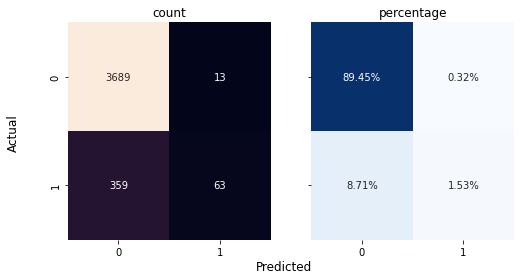

(0.14928909952606634, 0.8289473684210527, 0.25301204819277107)

In [87]:
xgb_clf = XGBClassifier(seed=0, 
                       colsample_bytree=space_eval(space, best)['colsample_bytree'], 
                       gamma=space_eval(space, best)['gamma'], 
                       learning_rate=space_eval(space, best)['learning_rate'], 
                       max_depth=space_eval(space, best)['max_depth'], 
                       reg_alpha=space_eval(space, best)['reg_alpha'],
                       reg_lambda=space_eval(space, best)['reg_lambda'])

xgb_clf.fit(x_train_noText,y_train_noText)
clf_report_metrics(model=xgb_clf,x_test=x_test_noText,y_test=y_test_noText)


#### Hyperparameter Tuning SVC with GridSearchCV

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'linear']}

In [80]:
x_train_Text, x_test_Text, y_train_Text, y_test_Text = train_test_split(df_x_onehot, df_y['state'],
                                                                             test_size=0.2, stratify=df_y['state'],
                                                                             random_state=42)

In [83]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,scoring='precision')
grid.fit(x_train_Text,y_train_Text)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  25.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  26.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  25.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  26.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  34.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   5.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   5.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   4.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   5.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   5.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   2.3s
[CV] END ......................C=0.1, gamma=1, 

[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   2.4s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   2.5s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   2.6s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   2.5s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   3.9s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   3.8s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   3.8s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   3.8s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   3.8s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   2.8s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   2.9s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   2.9s
[CV] END ...................

[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   5.2s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   5.1s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=22.5min
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=22.4min
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=20.5min
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=21.6min
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=61.2min
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   7.9s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   8.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   7.5s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   7.8s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   8.2s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'linear']},
             scoring='precision', verbose=2)

In [84]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

METRICS:

Recall: 0.055
Precision: 0.821
F1 Score: 0.102
__________________________________________________________________________

Confusion Matrix: 
 


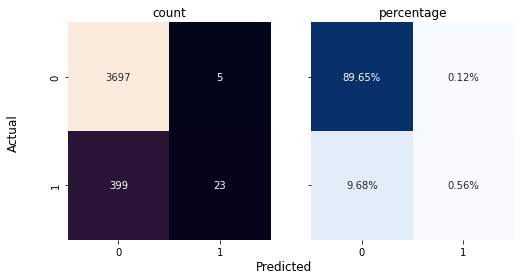

(0.054502369668246446, 0.8214285714285714, 0.10222222222222223)

In [86]:
support_clf = SVC(kernel=grid.best_params_['kernel'],C=grid.best_params_['C'],gamma=grid.best_params_['gamma'])
support_clf.fit(x_train_Text,y_train_Text)
clf_report_metrics(model=support_clf,x_test=x_test_Text,y_test=y_test_Text)

After tuning the hyperparameter, we do see a drastic improvement on our precision score. While the learning algorithm hugely decreases the false positive, which is our objective intially, however, looking at the confusion matrix and recall score, this comes at the expense of decreasing the true positives and increasing the false negatives. This is the trade off betweeen precision and recall.

What does it means in our model? It means that to generate high precision,<I><b> when the learning algorithm is unsure, it will likely to output as 0 than to take a risk to output as 1. </b></I>

We will next ask ourselves, does this suit the needs of an imaginary client? What we have in mind initially is that the imaginary client comes to us to ask for an advice whether his campaign will succeed or not? While our model is currently having a high prediction of false negative, when it is <b>confident in predicting the client will succeed, chances are he will likely to succeed (level of confidence is 82% from our model). </b>

This is <b>definitely better than when we tell he will succeed, he ended up not succeeding in his campaign</b> (high false positive). Hence, we can say that our model did pretty well in its performance.

Also, from our models, we see that there is <I><b>no significant difference between SVC and XGB classifier even after hyperparameter tuning</b></I>. Hence, we still can't come into an agreement which is a better model. Hence, we will <b>use both models</b> in helping us to <b>predict the success state of the campaign</b>. 